# EDA Malicious & Benign Site

Source: [amamid](https://www.kaggle.com/amamid/starter-malicious-and-benign-websites-f72c6de3-2)

## Explore Data Analysis

In [1]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
os.listdir()

['dataset.csv', 'malicious_benign_site.ipynb']

## Define Plotting Function

In [4]:
def plot_per_column_distribution(df, n_graph_show, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    n_row, n_cols = df.shape
    column_names = list(df)
    n_graph_row = (n_cols + n_graph_per_row - 1) / n_graph_per_row
    plt.figure(num=None, figsize=(6 * n_graph_per_row, 8 * n_graph_row), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(n_cols, n_graph_show)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_df = df.iloc[:, i]
        if (not np.issubdtype(type(column_df.iloc[0]), np.number)):
            value_counts = column_df.value_counts()
            value_counts.plot.bar()
        else:
            column_df.hist()
        plt.ylabel("counts")
        plt.xticks(rotation=90)
        plt.title(f"{column_names[i]} (column {i})")
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [5]:
def plot_corr_matrix(df, graph_width):
    filename = df.dataframeName
    df =  df.dropna('columns')

    df = df[[col for col in df if df[col].nunique() > 1]]

    if df.shape[1] < 2:
        print(f"No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2")
        return
    
    corr = df.corr()
    plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
    corr_mat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_mat)
    plt.title(f"Correlation Matrix for {filename}", fontsize=15)
    plt.show()

In [7]:
def plot_scatter_matrix(df, plot_size, text_size):
    df = df.select_dtypes(include=[np.number])

    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]

    column_names = list(df)
    if len(column_names) > 10:
        column_names = column_names[:10]
    
    df = df[column_names]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size],
                                    diagonal='kde')
    corrs = df.corr().values
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate("Corr. coef = %.3f" % corrs[i, j], (0.8, 0.2), 
                          xycoords='axes fraction', ha='center',
                          va='center', size=text_size)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

## Import dataset

In [8]:
df1 = pd.read_csv('dataset.csv', delimiter=',')
df1.dataframeName = 'dataset.csv'
n_row, n_col = df1.shape
print(f"There are {n_row} rows and {n_col} columns")

There are 1781 rows and 21 columns


In [10]:
df1.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


<ipython-input-17-5d2fb6c67a8a>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_graph_row, n_graph_per_row, i + 1)
<ipython-input-17-5d2fb6c67a8a>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_graph_row, n_graph_per_row, i + 1)
<ipython-input-17-5d2fb6c67a8a>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n_graph_row, n_graph_per_row, i + 1)


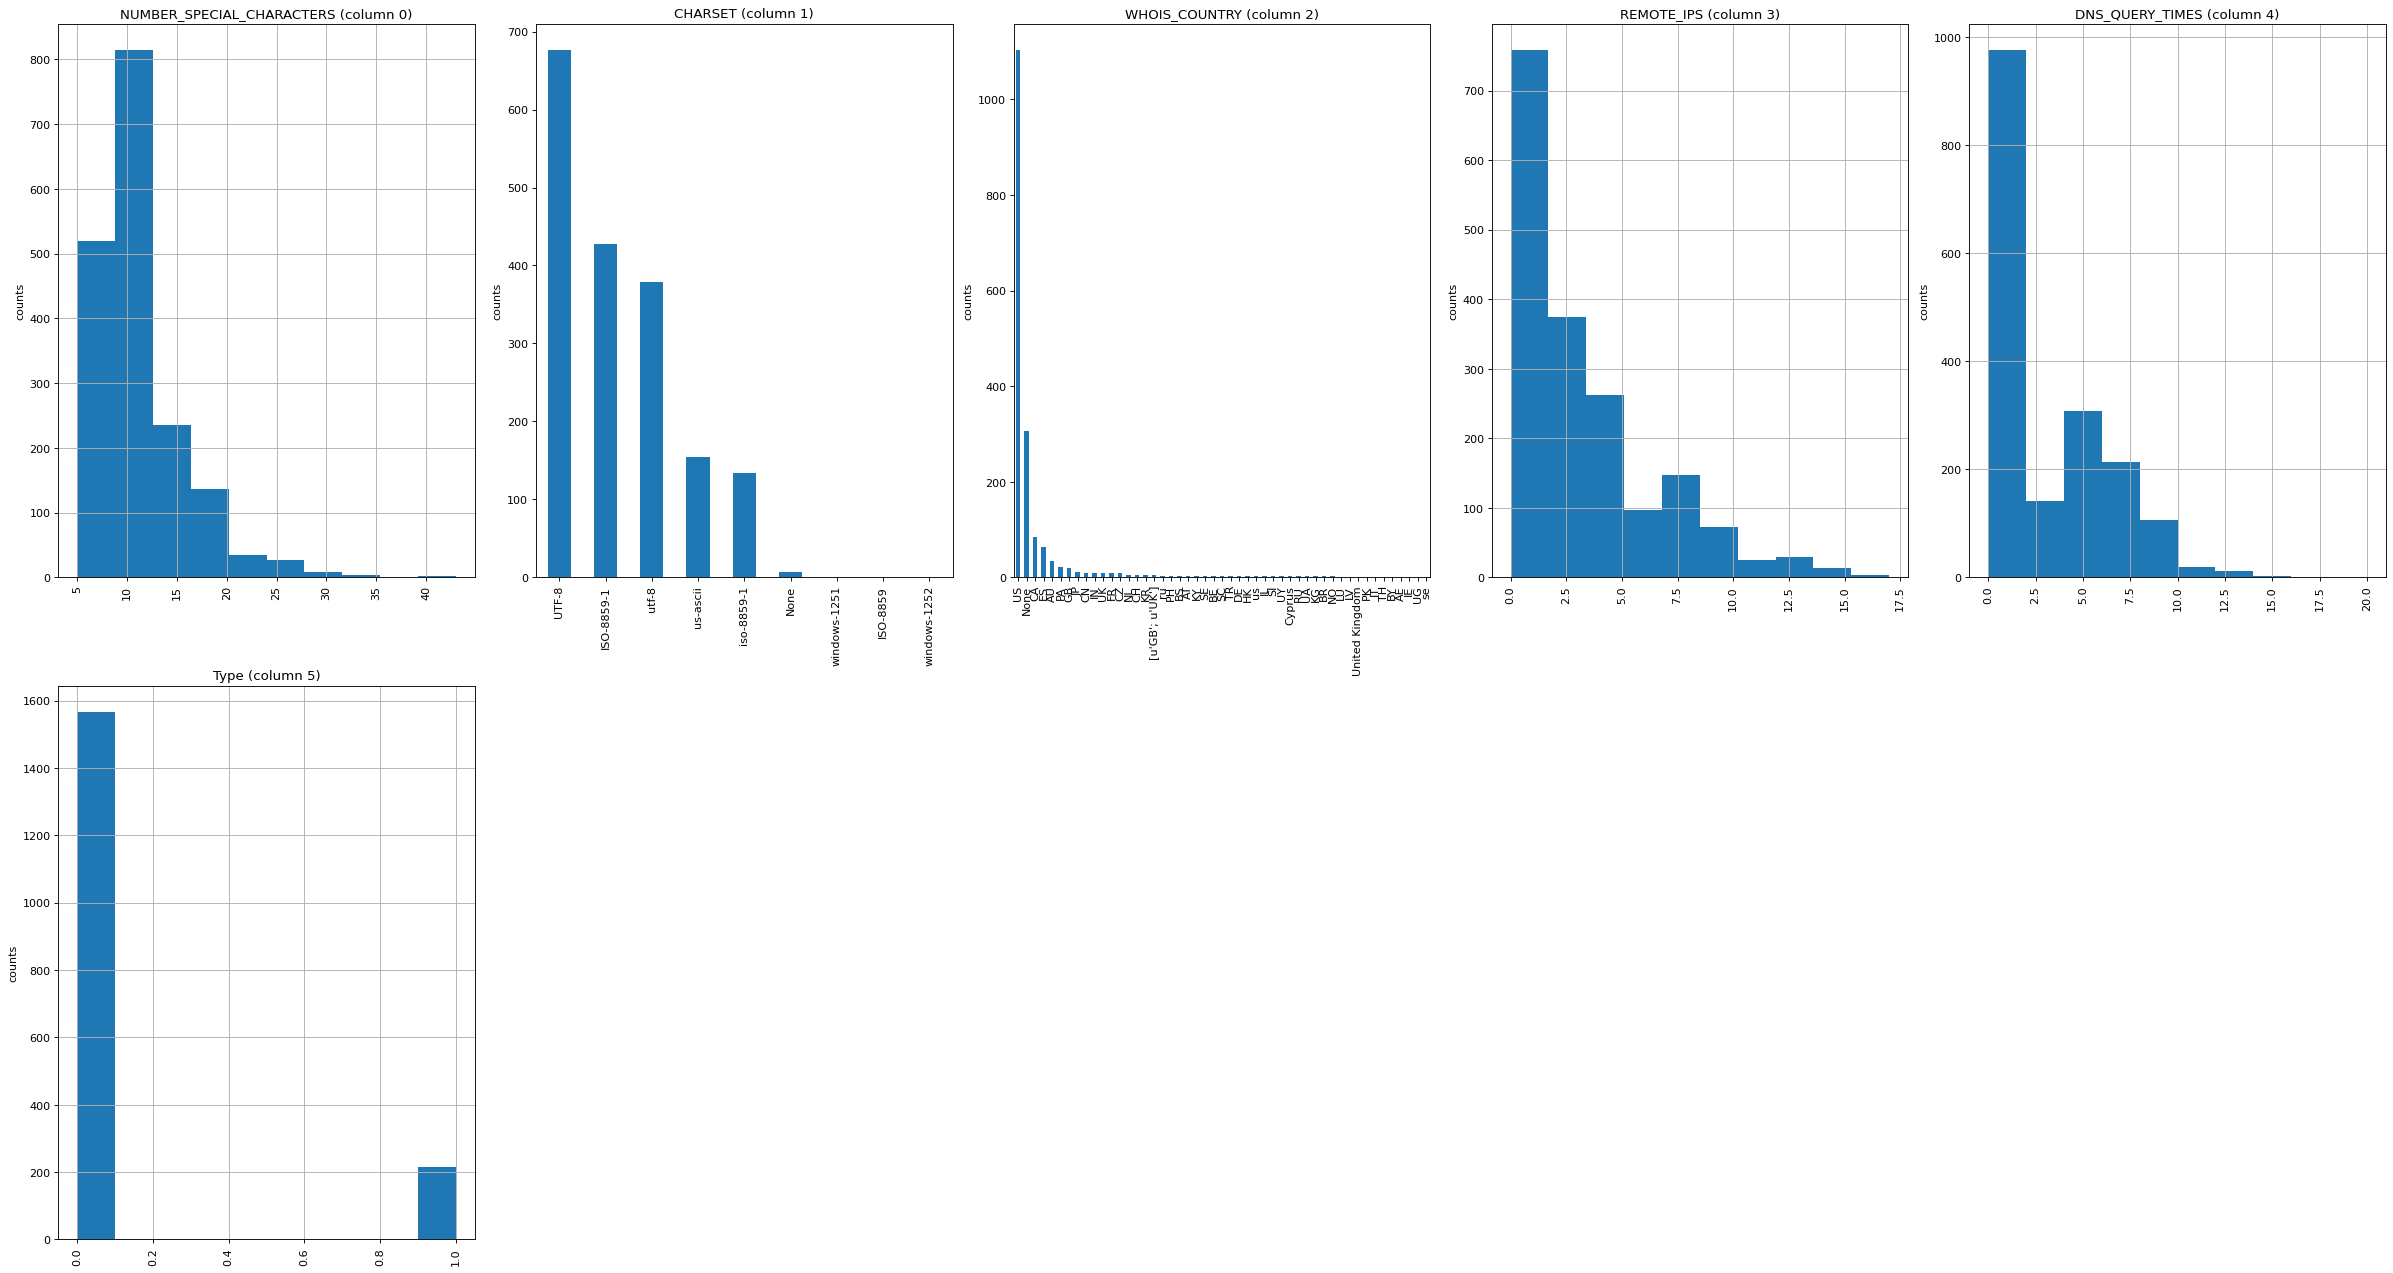

In [18]:
plot_per_column_distribution(df1, 10, 5)

<ipython-input-5-6231ea9bd544>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df =  df.dropna('columns')


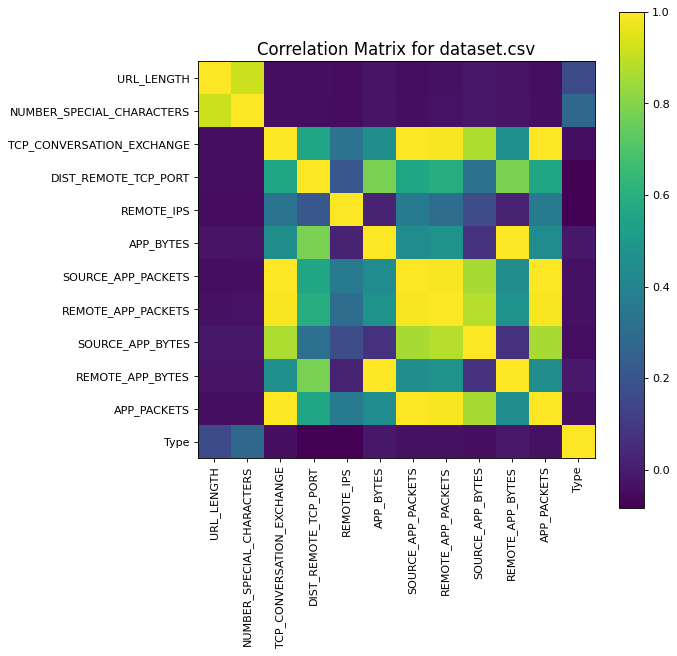

In [19]:
plot_corr_matrix(df1, 8)

<ipython-input-7-15c8dcc54bf6>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


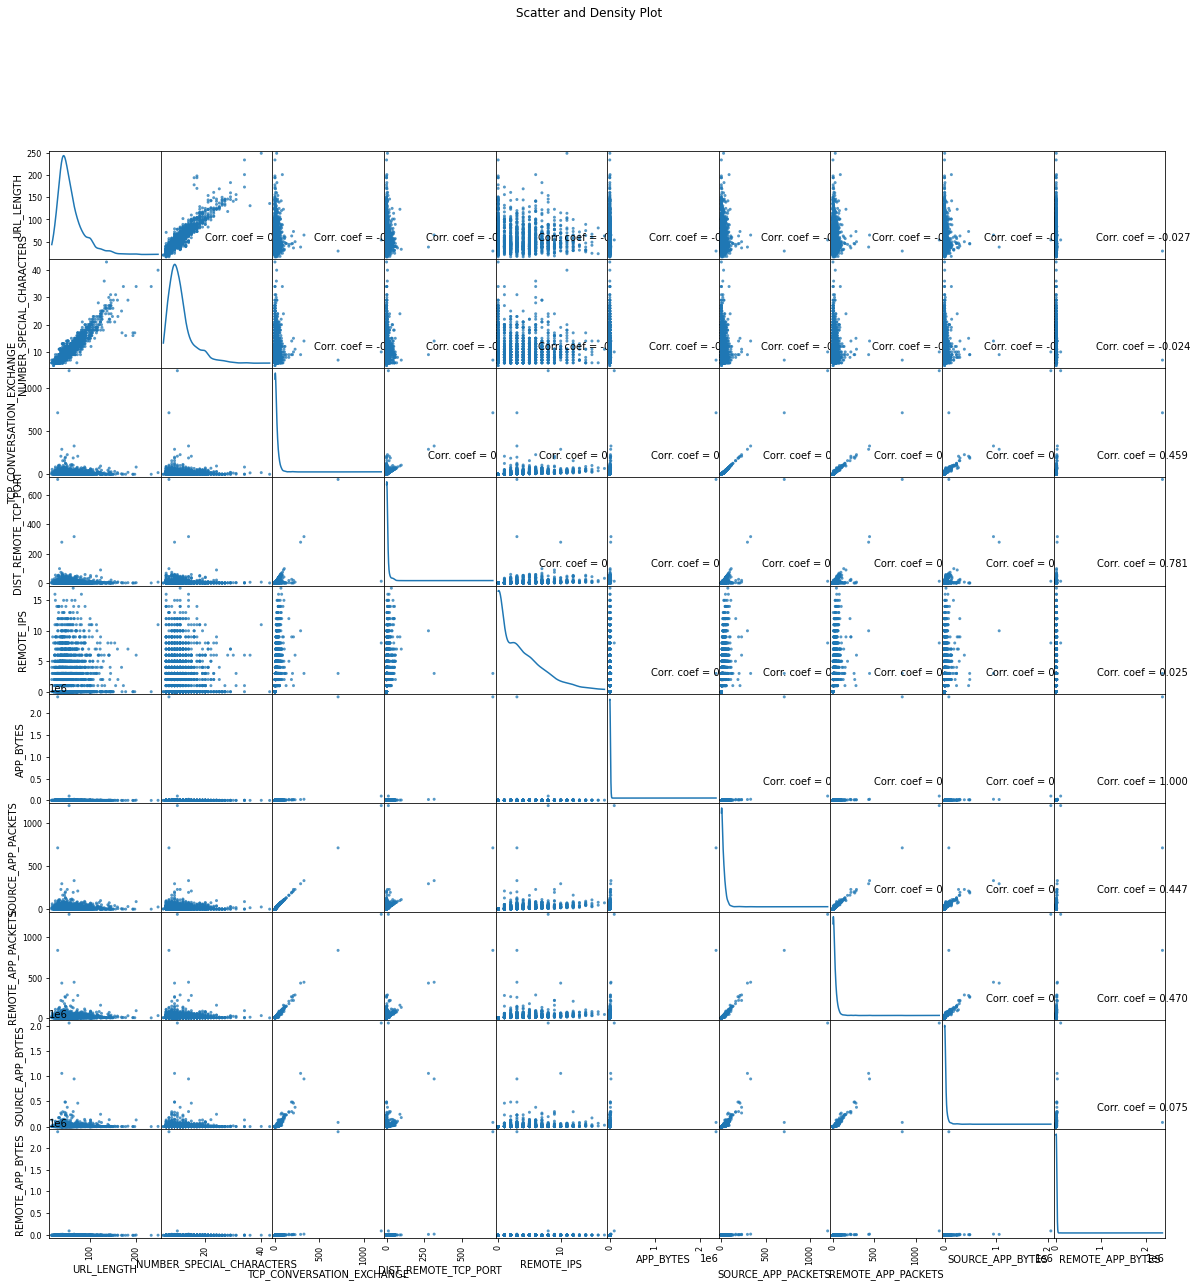

In [20]:
plot_scatter_matrix(df1, 20, 10)